# Models

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.compat.v1.keras.optimizers import Adam
from tensorflow.compat.v1.ragged import RaggedTensorValue
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
x = df.drop("Yield", axis=1)
y = df[["Yield"]]

In [4]:
x.head()

,Year,Area,Production,red soil,mountain soil,alluvial soil,clayey soil,laterite soil,loamy soil,sandy soil,...,District_Solapur,District_Unnao,Crop_Maize,Crop_Rice,Crop_Sugarcane,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Whole year
0,2012,45000,91900,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2012,7500,4600,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2012,6100,1100,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,2012,14700,24800,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2012,38900,46100,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [5]:
u = x.copy()

In [6]:
x.columns

Index(['Year', 'Area', 'Production', 'red soil', 'mountain soil',
       'alluvial soil', 'clayey soil', 'laterite soil', 'loamy soil',
       'sandy soil', 'black soil', 'forest soil', 'Mean_Seasonal_Rainfall',
       'District_Ahmednagar', 'District_Ariyalur', 'District_Azamgarh',
       'District_Bahraich', 'District_Bankura', 'District_Bardhaman',
       'District_Beed', 'District_Birbhum', 'District_Coimbatore',
       'District_Coochbehar', 'District_Cuddalore', 'District_Darjeeling',
       'District_Deoria', 'District_Dharmapuri', 'District_Dhule',
       'District_Dinajpur uttar', 'District_Dindigul', 'District_Erode',
       'District_Gondia', 'District_Gorakhpur', 'District_Hardoi',
       'District_Hooghly', 'District_Jalpaiguri', 'District_Kanchipuram',
       'District_Karur', 'District_Kheri', 'District_Kolhapur',
       'District_Krishnagiri', 'District_Madurai', 'District_Maharajganj',
       'District_Mainpuri', 'District_Maldah', 'District_Medinipur west',
       'Di

In [7]:
y.head()

,Yield
0,2.042222
1,0.613333
2,0.180328
3,1.687075
4,1.185090


In [8]:
len(y)

734

In [9]:
std = StandardScaler()
x = std.fit_transform(x)
y = std.fit_transform(y)
x_scaled = std.fit_transform(x)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(x_train, y_train)

# Predict on test set
lr_preds = lr_model.predict(x_test)

# Evaluate
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_squared = r2_score(y_test, lr_preds)
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression R^2: {lr_squared}")

Linear Regression RMSE: 0.23422016694077186
Linear Regression MAE: 0.10591620970555297
Linear Regression MSE: 0.05485908660176304
Linear Regression R^2: 0.9329947051954584


In [12]:
# Initialize Random Forest model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(x_train, y_train.ravel())

# Predict on test set
rf_preds = rf_model.predict(x_test)

# Evaluate
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_squared = r2_score(y_test, rf_preds)
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R^2: {rf_squared}")

Random Forest RMSE: 0.14943715890081924
Random Forest MAE: 0.03835237548711109
Random Forest MSE: 0.022331464460348702
Random Forest R^2: 0.9727241838631939


In [13]:
# Initialize XGBoost model
xgb_model = XGBRegressor()

# Train the model
xgb_model.fit(x_train, y_train)

# Predict on test set
xgb_preds = xgb_model.predict(x_test)

# Evaluate
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_squared = r2_score(y_test, xgb_preds)
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost MAE: {xgb_mae}")
print(f"XGBoost MSE: {xgb_mse}")
print(f"XGBoost R^2: {xgb_squared}")

XGBoost RMSE: 0.14952885286721027
XGBoost MAE: 0.034574893766597704
XGBoost MSE: 0.022358877839783818
XGBoost R^2: 0.9726907009584571


In [14]:
# Assuming you have reshaped your data for CNN
x_train_cnn = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_cnn = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Initialize CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train_cnn.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1))

# Compile the model
cnn_model.compile(optimizer='adam', loss='mse')

# Train the model
cnn_model.fit(x_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(x_test_cnn, y_test))

# Predict on test set
cnn_preds = cnn_model.predict(x_test_cnn).flatten()

# Evaluate
cnn_rmse = np.sqrt(mean_squared_error(y_test, cnn_preds))
cnn_mae = mean_absolute_error(y_test, cnn_preds)
cnn_mse = mean_squared_error(y_test, cnn_preds)
cnn_squared = r2_score(y_test, cnn_preds)
print(f"CNN RMSE: {cnn_rmse}")
print(f"CNN MAE: {cnn_mae}")
print(f"CNN MSE: {cnn_mse}")
print(f"CNN R^2: {cnn_squared}")



Epoch 1/10

19/19 [==============================] - 1s 10ms/step - loss: 0.5075 - val_loss: 0.1039
Epoch 2/10
19/19 [==============================] - 0s 3ms/step - loss: 0.1267 - val_loss: 0.0636
Epoch 3/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0769 - val_loss: 0.0479
Epoch 4/10
19/19 [==============================] - 0s 3ms/step - loss: 0.0523 - val_loss: 0.0173
Epoch 5/10
19/19 [==============================] - 0s 3ms/step - loss: 0.0378 - val_loss: 0.0163
Epoch 6/10
19/19 [==============================] - 0s 3ms/step - loss: 0.0312 - val_loss: 0.0164
Epoch 7/10
19/19 [==============================] - 0s 3ms/step - loss: 0.0233 - val_loss: 0.0174
Epoch 8/10
19/19 [==============================] - 0s 3ms/step - loss: 0.0203 - val_loss: 0.0231
Epoch 9/10
19/19 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.0252
Epoch 10/10
5/5 [==============================] - 0s 1ms/step
CNN RMSE: 0.16732467233339482
CNN MAE: 0.0927438512

In [15]:
# Initialize LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
lstm_model.fit(x_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(x_test_cnn, y_test))

# Predict on test set
lstm_preds = lstm_model.predict(x_test_cnn).flatten()

# Evaluate
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_preds))
lstm_mae = mean_absolute_error(y_test, lstm_preds)
lstm_mse = mean_squared_error(y_test, lstm_preds)
lstm_squared = r2_score(y_test, lstm_preds)
print(f"LSTM RMSE: {lstm_rmse}")
print(f"LSTM MAE: {lstm_mae}")
print(f"LSTM MSE: {lstm_mse}")
print(f"LSTM R^2: {lstm_squared}")

Epoch 1/10
19/19 [==============================] - 2s 59ms/step - loss: 1.0957 - val_loss: 0.8115
Epoch 2/10
19/19 [==============================] - 1s 32ms/step - loss: 0.9880 - val_loss: 0.7001
Epoch 3/10
19/19 [==============================] - 1s 37ms/step - loss: 0.9010 - val_loss: 0.6820
Epoch 4/10
19/19 [==============================] - 1s 27ms/step - loss: 0.8894 - val_loss: 0.6733
Epoch 5/10
19/19 [==============================] - 1s 38ms/step - loss: 0.8721 - val_loss: 0.6563
Epoch 6/10
19/19 [==============================] - 1s 38ms/step - loss: 0.8486 - val_loss: 0.6353
Epoch 7/10
19/19 [==============================] - 1s 45ms/step - loss: 0.8228 - val_loss: 0.6103
Epoch 8/10
19/19 [==============================] - 1s 37ms/step - loss: 0.7924 - val_loss: 0.5780
Epoch 9/10
19/19 [==============================] - 1s 41ms/step - loss: 4061.7351 - val_loss: 0.5517
Epoch 10/10
5/5 [==============================] - 0s 11ms/step
LSTM RMSE: 0.7934552038009864
LSTM MAE: 0.

In [16]:
# Initialize DNN model
dnn_model = Sequential()
dnn_model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(1))

# Compile the model
dnn_model.compile(optimizer='adam', loss='mse')

# Train the model
dnn_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Predict on test set
dnn_preds = dnn_model.predict(x_test).flatten()

# Evaluate
dnn_rmse = np.sqrt(mean_squared_error(y_test, dnn_preds))
dnn_mae = mean_absolute_error(y_test, dnn_preds)
dnn_mse = mean_squared_error(y_test, dnn_preds)
dnn_squared = r2_score(y_test, dnn_preds)
print(f"DNN RMSE: {dnn_rmse}")
print(f"DNN MAE: {dnn_mae}")
print(f"DNN MSE: {dnn_mse}")
print(f"DNN R^2: {dnn_squared}")

Epoch 1/10
19/19 [==============================] - 1s 21ms/step - loss: 1.3084 - val_loss: 0.6437
Epoch 2/10
19/19 [==============================] - 0s 7ms/step - loss: 0.6148 - val_loss: 0.3801
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 0.3131 - val_loss: 0.1985
Epoch 4/10
19/19 [==============================] - 0s 5ms/step - loss: 0.1710 - val_loss: 0.1018
Epoch 5/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0972 - val_loss: 0.0745
Epoch 6/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0781 - val_loss: 0.0627
Epoch 7/10
19/19 [==============================] - 0s 5ms/step - loss: 0.0554 - val_loss: 0.0620
Epoch 8/10
19/19 [==============================] - 0s 6ms/step - loss: 0.0450 - val_loss: 0.0528
Epoch 9/10
19/19 [==============================] - 0s 9ms/step - loss: 0.0346 - val_loss: 0.0466
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
DNN RMSE: 0.20833758141347414
DNN MAE: 0.1213134745988

In [17]:
x_train.shape

(587, 73)

In [18]:
y_train = y_train.reshape(-1, 1)

# Train a DNN
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))

# Add more layers as needed
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Extract features from the DNN
dnn_features_train = model.predict(x_train)
dnn_features_test = model.predict(x_test)

# Train XGBoost
xgb_model_h = XGBRegressor(n_estimators=100)
xgb_model_h.fit(dnn_features_train, y_train)

# Combine predictions
hybrid_preds = xgb_model_h.predict(dnn_features_test)

# Evaluate
hybrid_rmse = np.sqrt(mean_squared_error(y_test, hybrid_preds))
hybrid_mae = mean_absolute_error(y_test, hybrid_preds)
hybrid_mse = mean_squared_error(y_test, hybrid_preds)
hybrid_squared = r2_score(y_test, hybrid_preds)
print(f"Hybrid Model RMSE: {hybrid_rmse}")
print(f"Hybrid Model MAE: {hybrid_mae}")
print(f"Hybrid Model MSE: {hybrid_mae}")
print(f"Hybrid Model R^2: {hybrid_squared}")

Epoch 1/10
19/19 [==============================] - 1s 2ms/step - loss: 1.4692
Epoch 2/10
19/19 [==============================] - 0s 3ms/step - loss: 1.3206
Epoch 3/10
19/19 [==============================] - 0s 4ms/step - loss: 1.1957
Epoch 4/10
19/19 [==============================] - 0s 4ms/step - loss: 1.0822
Epoch 5/10
19/19 [==============================] - 0s 3ms/step - loss: 0.9813
Epoch 6/10
19/19 [==============================] - 0s 4ms/step - loss: 0.8926
Epoch 7/10
19/19 [==============================] - 0s 3ms/step - loss: 0.8114
Epoch 8/10
19/19 [==============================] - 0s 4ms/step - loss: 0.7351
Epoch 9/10
19/19 [==============================] - 0s 5ms/step - loss: 0.6655
Epoch 10/10
5/5 [==============================] - 0s 2ms/step


C:\Users\vansi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Hybrid Model RMSE: 0.12498419045551065
Hybrid Model MAE: 0.04656382913689911
Hybrid Model MSE: 0.04656382913689911
Hybrid Model R^2: 0.9809203364090019


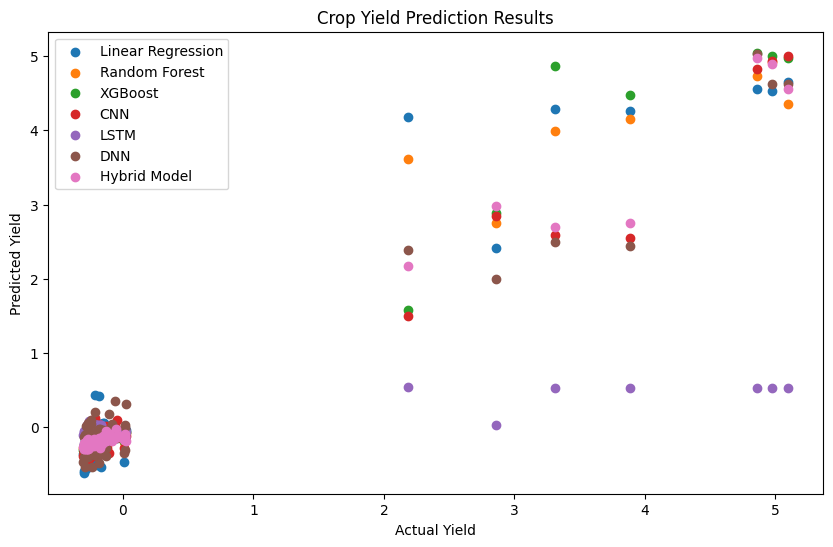

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_preds, label='Linear Regression', marker='o')
plt.scatter(y_test, rf_preds, label='Random Forest', marker='o')
plt.scatter(y_test, xgb_preds, label='XGBoost', marker='o')
plt.scatter(y_test, cnn_preds, label='CNN', marker='o')
plt.scatter(y_test, lstm_preds, label='LSTM', marker='o')
plt.scatter(y_test, dnn_preds, label='DNN', marker='o')
plt.scatter(y_test, hybrid_preds, label='Hybrid Model', marker='o')

plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Crop Yield Prediction Results')
plt.legend()
plt.show()

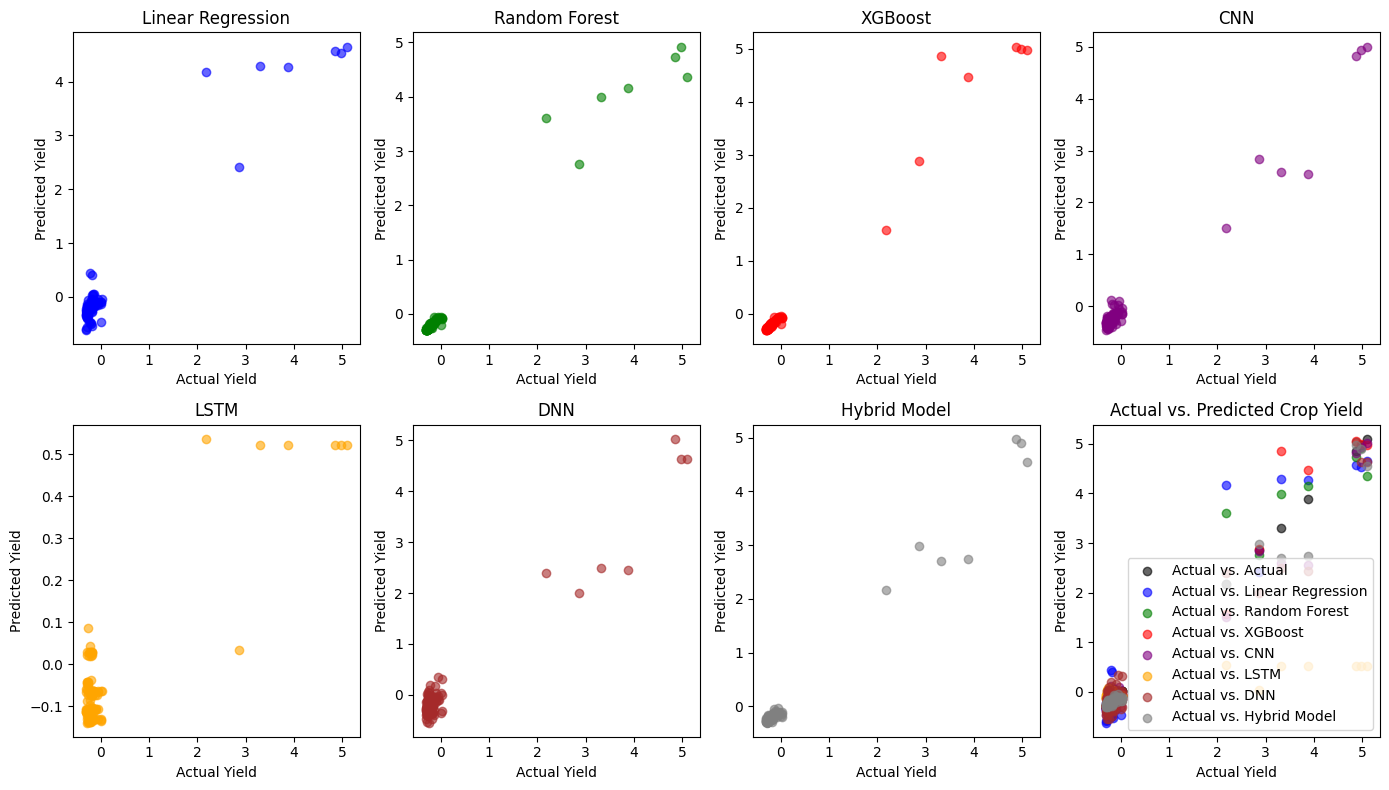

In [20]:
# Visualize Results
plt.figure(figsize=(14, 8))

# Linear Regression
plt.subplot(2, 4, 1)
plt.scatter(y_test, lr_preds, color='blue', alpha=0.6)
plt.title('Linear Regression')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# Random Forest
plt.subplot(2, 4, 2)
plt.scatter(y_test, rf_preds, color='green', alpha=0.6)
plt.title('Random Forest')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# XGBoost
plt.subplot(2, 4, 3)
plt.scatter(y_test, xgb_preds, color='red', alpha=0.6)
plt.title('XGBoost')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# CNN
plt.subplot(2, 4, 4)
plt.scatter(y_test, cnn_preds, color='purple', alpha=0.6)
plt.title('CNN')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# LSTM
plt.subplot(2, 4, 5)
plt.scatter(y_test, lstm_preds, color='orange', alpha=0.6)
plt.title('LSTM')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# DNN
plt.subplot(2, 4, 6)
plt.scatter(y_test, dnn_preds, color='brown', alpha=0.6)
plt.title('DNN')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# Hybrid Model
plt.subplot(2, 4, 7)
plt.scatter(y_test, hybrid_preds, color='gray', alpha=0.6)
plt.title('Hybrid Model')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# Actual vs. Predicted
plt.subplot(2, 4, 8)
plt.scatter(y_test, y_test, color='black', alpha=0.6, label='Actual vs. Actual')
plt.scatter(y_test, lr_preds, color='blue', alpha=0.6, label='Actual vs. Linear Regression')
plt.scatter(y_test, rf_preds, color='green', alpha=0.6, label='Actual vs. Random Forest')
plt.scatter(y_test, xgb_preds, color='red', alpha=0.6, label='Actual vs. XGBoost')
plt.scatter(y_test, cnn_preds, color='purple', alpha=0.6, label='Actual vs. CNN')
plt.scatter(y_test, lstm_preds, color='orange', alpha=0.6, label='Actual vs. LSTM')
plt.scatter(y_test, dnn_preds, color='brown', alpha=0.6, label='Actual vs. DNN')
plt.scatter(y_test, hybrid_preds, color='gray', alpha=0.6, label='Actual vs. Hybrid Model')

plt.title('Actual vs. Predicted Crop Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.tight_layout()
plt.show()

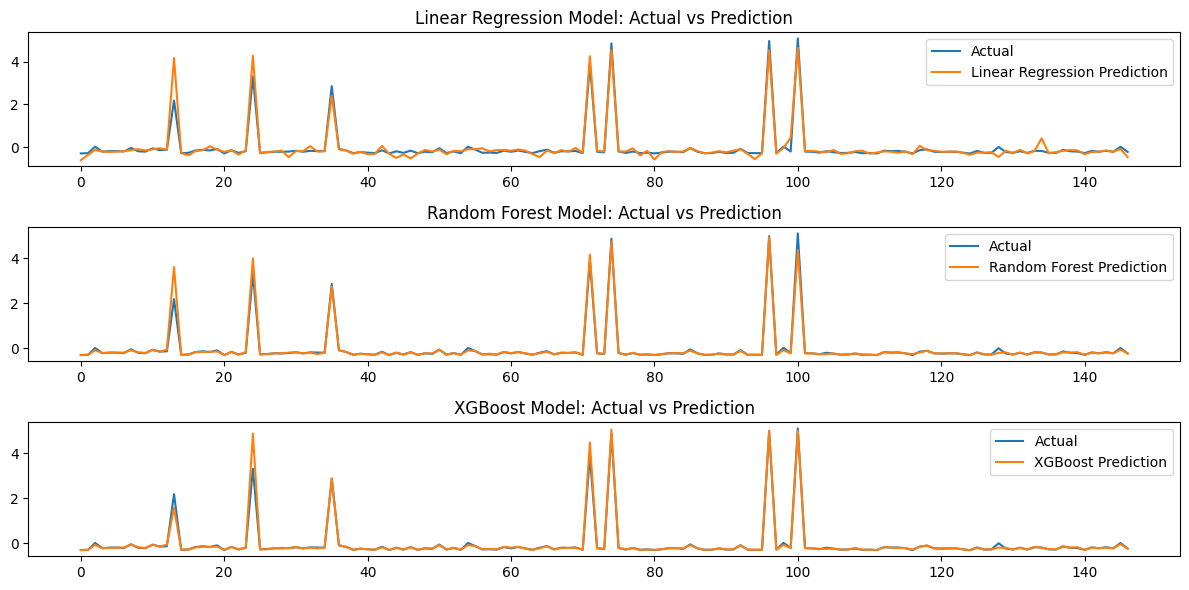

In [21]:
# Plotting Linear Regression predictions
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(y_test_scaled, label='Actual')
plt.plot(lr_preds, label='Linear Regression Prediction')
plt.title('Linear Regression Model: Actual vs Prediction')
plt.legend()

# Plotting Random Forest predictions
plt.subplot(3, 1, 2)
plt.plot(y_test_scaled, label='Actual')
plt.plot(rf_preds, label='Random Forest Prediction')
plt.title('Random Forest Model: Actual vs Prediction')
plt.legend()

# Plotting XGBoost predictions
plt.subplot(3, 1, 3)
plt.plot(y_test_scaled, label='Actual')
plt.plot(xgb_preds, label='XGBoost Prediction')
plt.title('XGBoost Model: Actual vs Prediction')
plt.legend()

plt.tight_layout()
plt.show()

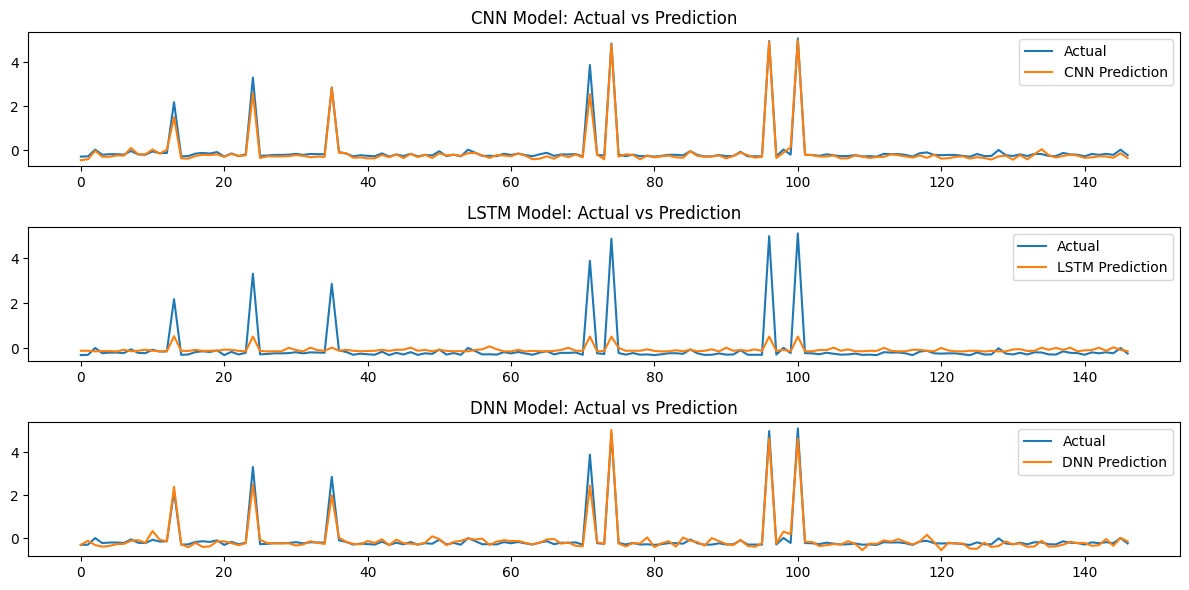

In [22]:
# Plotting CNN predictions
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(y_test_scaled, label='Actual')
plt.plot(cnn_preds, label='CNN Prediction')  # Assuming cnn_pred is a 2D array, we select the first column
plt.title('CNN Model: Actual vs Prediction')
plt.legend()

# Plotting LSTM predictions
plt.subplot(3, 1, 2)
plt.plot(y_test_scaled, label='Actual')
plt.plot(lstm_preds, label='LSTM Prediction')  # Assuming lstm_pred is a 2D array, we select the first column
plt.title('LSTM Model: Actual vs Prediction')
plt.legend()

# Plotting DNN predictions
plt.subplot(3, 1, 3)
plt.plot(y_test_scaled, label='Actual')
plt.plot(dnn_preds, label='DNN Prediction')
plt.title('DNN Model: Actual vs Prediction')
plt.legend()

plt.tight_layout()
plt.show()

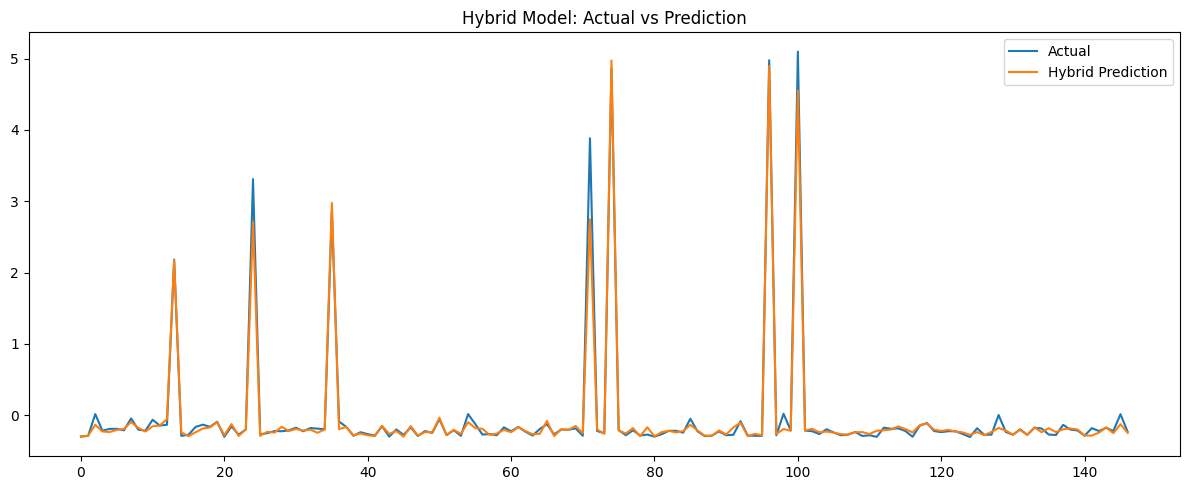

In [23]:
# Plotting Hybrid predictions
plt.figure(figsize=(12, 5))
plt.plot(y_test_scaled, label='Actual')
plt.plot(hybrid_preds, label='Hybrid Prediction')
plt.title('Hybrid Model: Actual vs Prediction')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
# Flatten the arrays to ensure they are 1-dimensional
lr_preds_flat = lr_preds.flatten()
rf_preds_flat = rf_preds.flatten()
xgb_preds_flat = xgb_preds.flatten()
cnn_preds_flat = cnn_preds.flatten()
lstm_preds_flat = lstm_preds.flatten()
dnn_preds_flat = dnn_preds.flatten()
hybrid_preds_flat = hybrid_preds.flatten()

In [25]:
print("Shapes of prediction arrays:")
print("Linear Regression:", lr_preds_flat.shape)
print("Random Forest:", rf_preds_flat.shape)
print("XGBoost:", xgb_preds_flat.shape)
print("CNN:", cnn_preds_flat.shape)
print("LSTM:", lstm_preds_flat.shape)
print("DNN:", dnn_preds_flat.shape)
print("Hybrid Model:", hybrid_preds_flat.shape)


Shapes of prediction arrays:
Linear Regression: (147,)
Random Forest: (147,)
XGBoost: (147,)
CNN: (147,)
LSTM: (147,)
DNN: (147,)
Hybrid Model: (147,)


In [26]:
print("Shape of y_test:", y_test.shape)

Shape of y_test: (147, 1)


In [27]:
# Flatten y_test to make it 1-dimensional
y_test_flat = y_test.flatten()

# Creating a DataFrame with model predictions and evaluation metrics
df_results = pd.DataFrame({
    'Actual': y_test_flat,
    'Linear Regression': lr_preds_flat,
    'Random Forest': rf_preds_flat,
    'XGBoost': xgb_preds_flat,
    'CNN': cnn_preds_flat,
    'LSTM': lstm_preds_flat,
    'DNN': dnn_preds_flat,
    'Hybrid Model': hybrid_preds_flat
})


In [28]:
# Adding evaluation metrics to the DataFrame
df_metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'CNN', 'LSTM', 'DNN', 'Hybrid Model'],
    'RMSE': [lr_rmse, rf_rmse, xgb_rmse, cnn_rmse, lstm_rmse, dnn_rmse, hybrid_rmse],
    'MAE': [lr_mae, rf_mae, xgb_mae, cnn_mae, lstm_mae, dnn_mae, hybrid_mae],
    'MSE': [lr_mse, rf_mse, xgb_mse, cnn_mse, lstm_mse, dnn_mse, hybrid_mse],
    'R^2': [lr_squared, rf_squared, xgb_squared, cnn_squared, lstm_squared, dnn_squared, hybrid_squared]
})

df_metrics.set_index('Model', inplace=True)

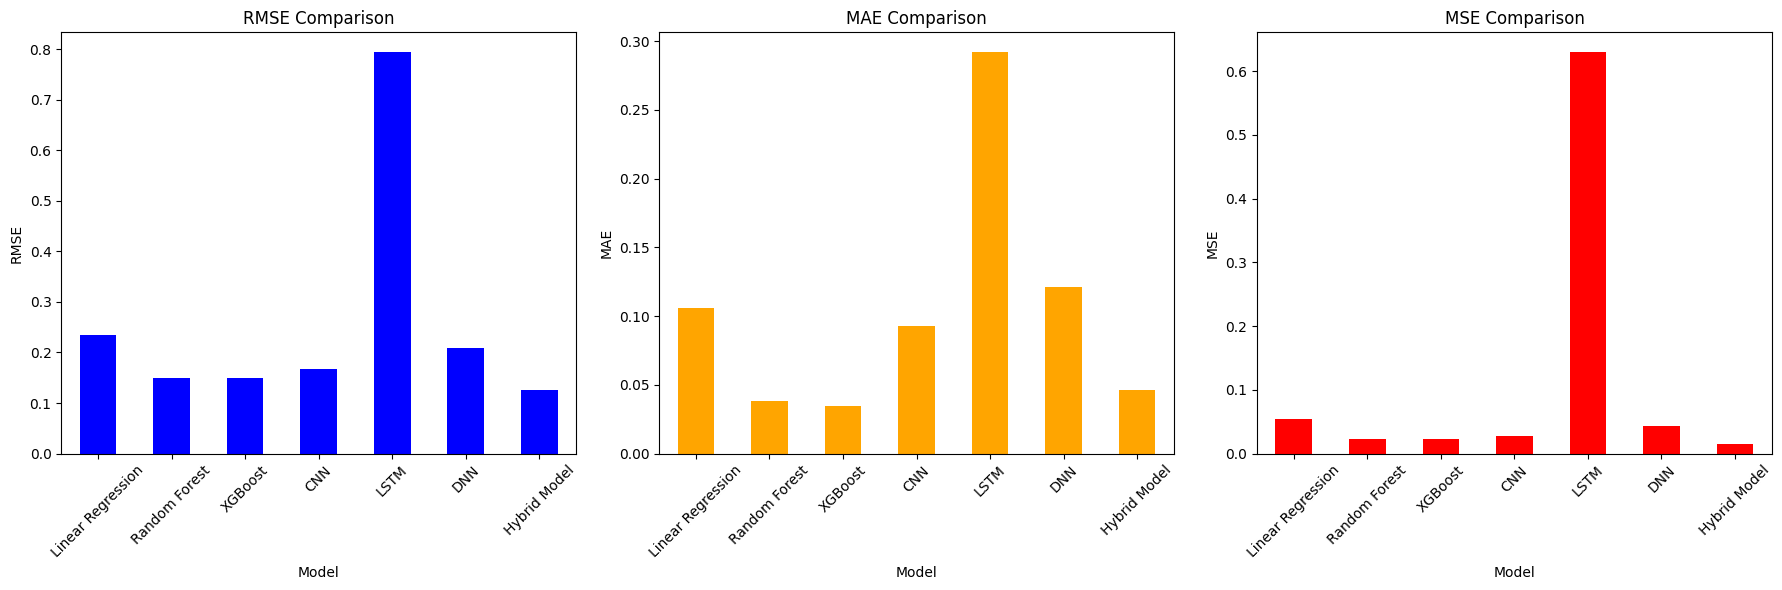

In [29]:
# Plotting evaluation metrics
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# RMSE Comparison
df_metrics['RMSE'].plot(kind='bar', color='blue', ax=axs[0], rot=45)
axs[0].set_title('RMSE Comparison')
axs[0].set_ylabel('RMSE')

# MAE Comparison
df_metrics['MAE'].plot(kind='bar', color='orange', ax=axs[1], rot=45)
axs[1].set_title('MAE Comparison')
axs[1].set_ylabel('MAE')

# MSE Comparison
df_metrics['MSE'].plot(kind='bar', color='red', ax=axs[2], rot=45)
axs[2].set_title('MSE Comparison')
axs[2].set_ylabel('MSE')

plt.tight_layout()
plt.show()

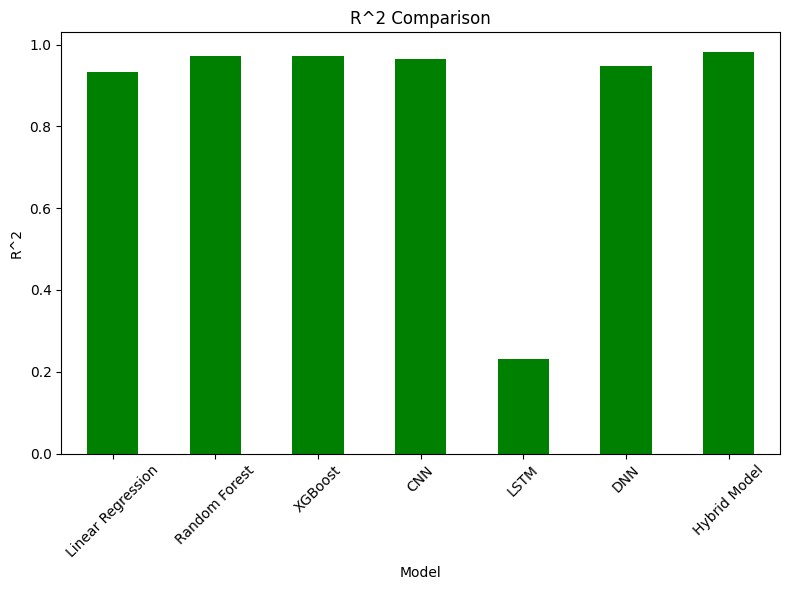

In [30]:
# Plotting R^2
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# R^2 Comparison
df_metrics['R^2'].plot(kind='bar', color='green', ax=axs, rot=45)
axs.set_title('R^2 Comparison')
axs.set_ylabel('R^2')

plt.tight_layout()
plt.show()

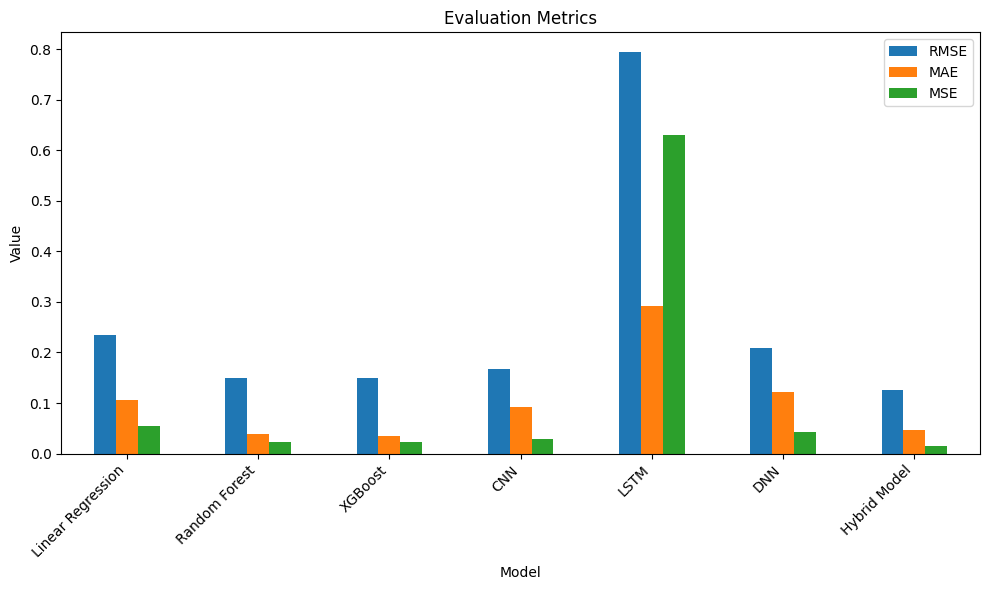

In [31]:
# Plotting only the bar plot for evaluation metrics
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Bar plot for evaluation metrics
df_metrics.plot(kind='bar', y=['RMSE', 'MAE', 'MSE'], ax=axes)
axes.set_title('Evaluation Metrics')
axes.set_ylabel('Value')
axes.set_xticklabels(df_metrics.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

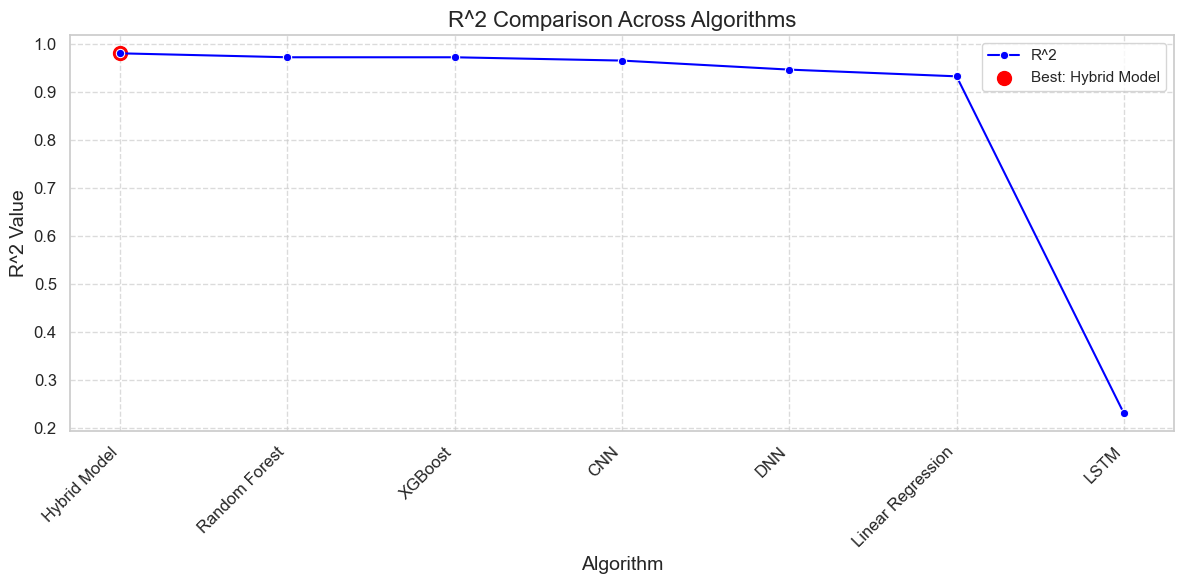

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Sort the DataFrame by R^2 values
df_metrics_sorted = df_metrics.sort_values(by='R^2', ascending=False)

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_metrics_sorted.index, y=df_metrics_sorted['R^2'], marker='o', color='blue', label='R^2')

# Highlight the best algorithm with a marker
best_algorithm = df_metrics_sorted.index[0]
best_r2 = df_metrics_sorted.loc[best_algorithm, 'R^2']
plt.scatter([best_algorithm], [best_r2], color='red', marker='o', label=f'Best: {best_algorithm}', s=100)

# Customize the plot
plt.title('R^2 Comparison Across Algorithms', fontsize=16)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('R^2 Value', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\vansi\AppData\Local\Temp\ipykernel_4648\375110370.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r2_values_sorted = r2_values_percentage[sorted_indices]


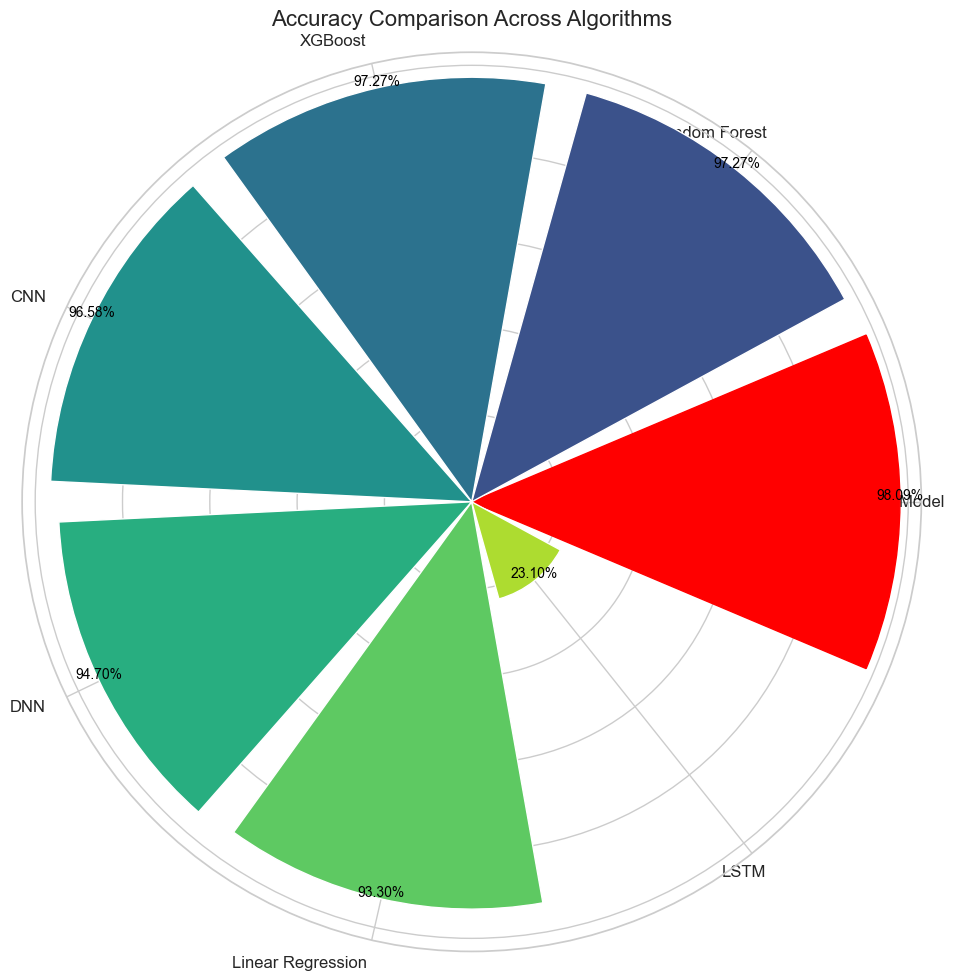

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create some example data
algorithms = df_metrics.index
r2_values = df_metrics['R^2']

# Convert R^2 values to percentage
r2_values_percentage = r2_values * 100

# Sort the data
sorted_indices = np.argsort(r2_values_percentage)[::-1]
algorithms_sorted = algorithms[sorted_indices]
r2_values_sorted = r2_values_percentage[sorted_indices]

# Create a polar plot
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Plot the data
theta = np.linspace(0, 2*np.pi, len(algorithms_sorted), endpoint=False)
bars = ax.bar(theta, r2_values_sorted, color=sns.color_palette("viridis", len(algorithms_sorted)))

# Highlight the best algorithm
best_algorithm_index = np.argmax(r2_values_sorted)
bars[best_algorithm_index].set_color('red')

# Customize the plot
ax.set_xticks(theta)
ax.set_xticklabels(algorithms_sorted, fontsize=12, ha='right', wrap=True)  # wrap=True for automatic line wrapping
ax.set_yticklabels([])  # Hide radial labels
ax.set_title('Accuracy Comparison Across Algorithms', fontsize=16)

# Display the values on top of the bars
for bar, label in zip(bars, r2_values_sorted):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label:.2f}%',
            ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()  # Ensure labels are not cut off
plt.show()

C:\Users\vansi\AppData\Local\Temp\ipykernel_4648\2781149302.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='R^2', y=df_sorted.index, data=df_sorted, palette='viridis')


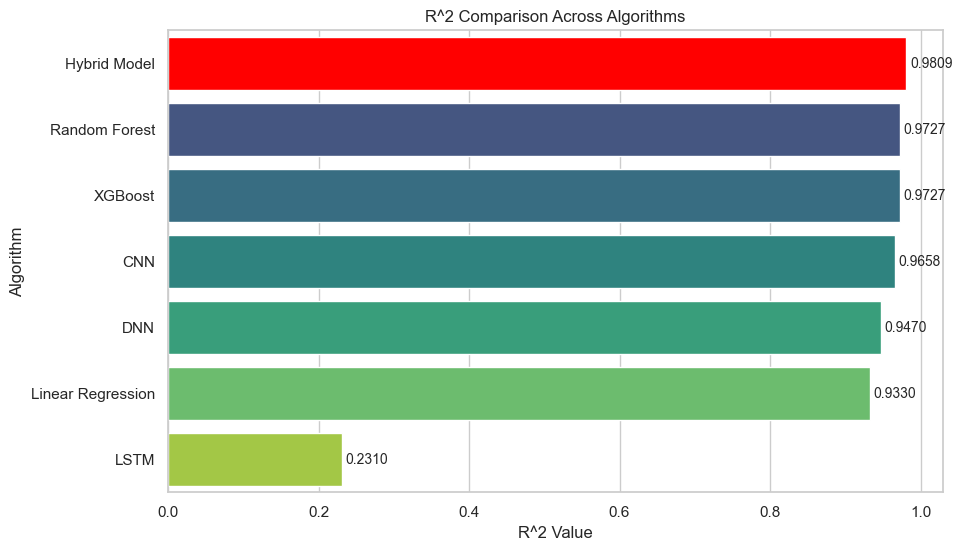

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the data by R^2 values
df_sorted = df_metrics.sort_values(by='R^2', ascending=False)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='R^2', y=df_sorted.index, data=df_sorted, palette='viridis')

# Highlight the best algorithm
best_algorithm = df_sorted.index[0]
best_index = df_sorted.index.get_loc(best_algorithm)
bars.patches[best_index].set_facecolor('red')

# Customize the plot
plt.title('R^2 Comparison Across Algorithms')
plt.xlabel('R^2 Value')
plt.ylabel('Algorithm')

# Display R^2 values next to the bars
for index, value in enumerate(df_sorted['R^2']):
    plt.text(value + 0.005, index, f'{value:.4f}', va='center', fontsize=10)

plt.show()

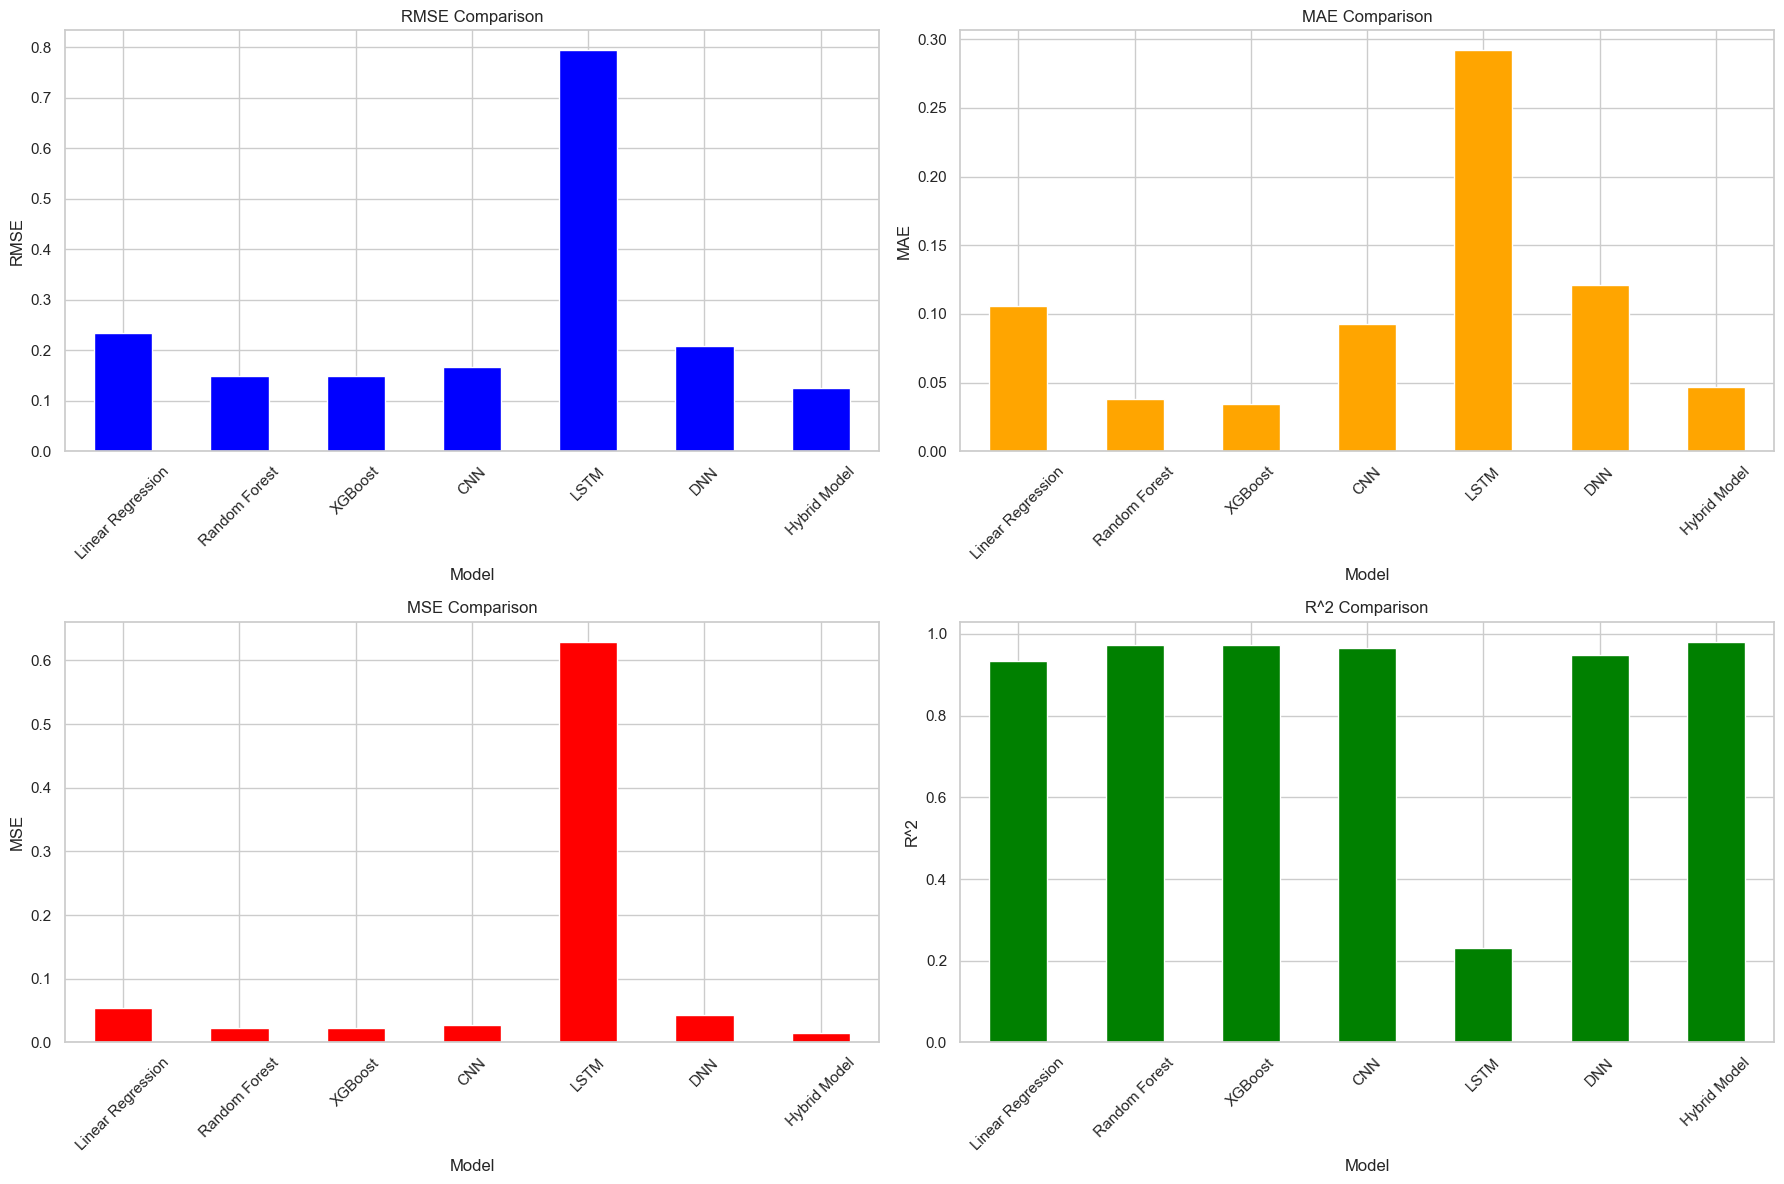

In [35]:
# Plotting evaluation metrics
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# RMSE Comparison
df_metrics['RMSE'].plot(kind='bar', color='blue', ax=axs[0, 0], rot=45)
axs[0, 0].set_title('RMSE Comparison')
axs[0, 0].set_ylabel('RMSE')

# MAE Comparison
df_metrics['MAE'].plot(kind='bar', color='orange', ax=axs[0, 1], rot=45)
axs[0, 1].set_title('MAE Comparison')
axs[0, 1].set_ylabel('MAE')

# MSE Comparison
df_metrics['MSE'].plot(kind='bar', color='red', ax=axs[1, 0], rot=45)
axs[1, 0].set_title('MSE Comparison')
axs[1, 0].set_ylabel('MSE')

# R^2 Comparison
df_metrics['R^2'].plot(kind='bar', color='green', ax=axs[1, 1], rot=45)
axs[1, 1].set_title('R^2 Comparison')
axs[1, 1].set_ylabel('R^2')

plt.tight_layout()
plt.show()

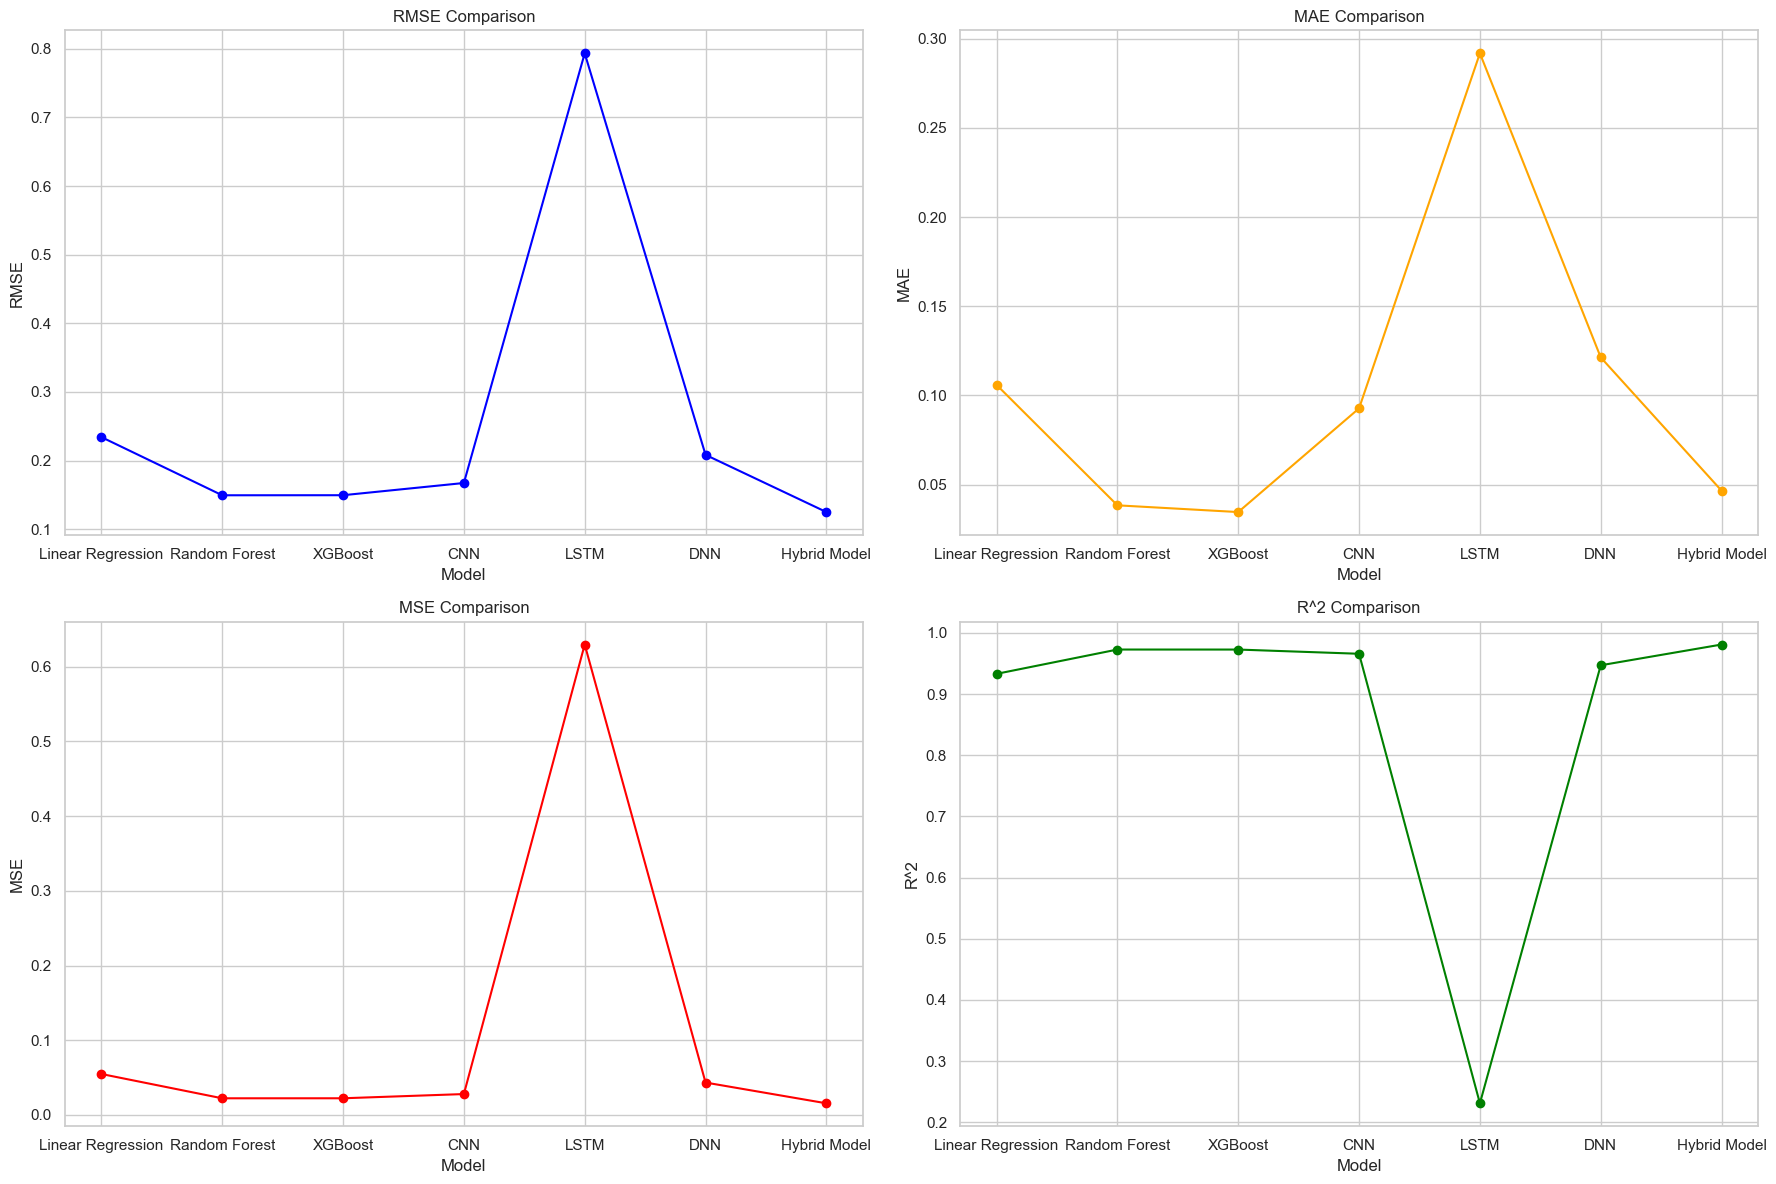

In [36]:
# Plotting evaluation metrics as line graphs
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# RMSE Comparison
df_metrics['RMSE'].plot(kind='line', marker='o', color='blue', ax=axs[0, 0])
axs[0, 0].set_title('RMSE Comparison')
axs[0, 0].set_ylabel('RMSE')

# MAE Comparison
df_metrics['MAE'].plot(kind='line', marker='o', color='orange', ax=axs[0, 1])
axs[0, 1].set_title('MAE Comparison')
axs[0, 1].set_ylabel('MAE')

# MSE Comparison
df_metrics['MSE'].plot(kind='line', marker='o', color='red', ax=axs[1, 0])
axs[1, 0].set_title('MSE Comparison')
axs[1, 0].set_ylabel('MSE')

# R^2 Comparison
df_metrics['R^2'].plot(kind='line', marker='o', color='green', ax=axs[1, 1])
axs[1, 1].set_title('R^2 Comparison')
axs[1, 1].set_ylabel('R^2')

plt.tight_layout()
plt.show()

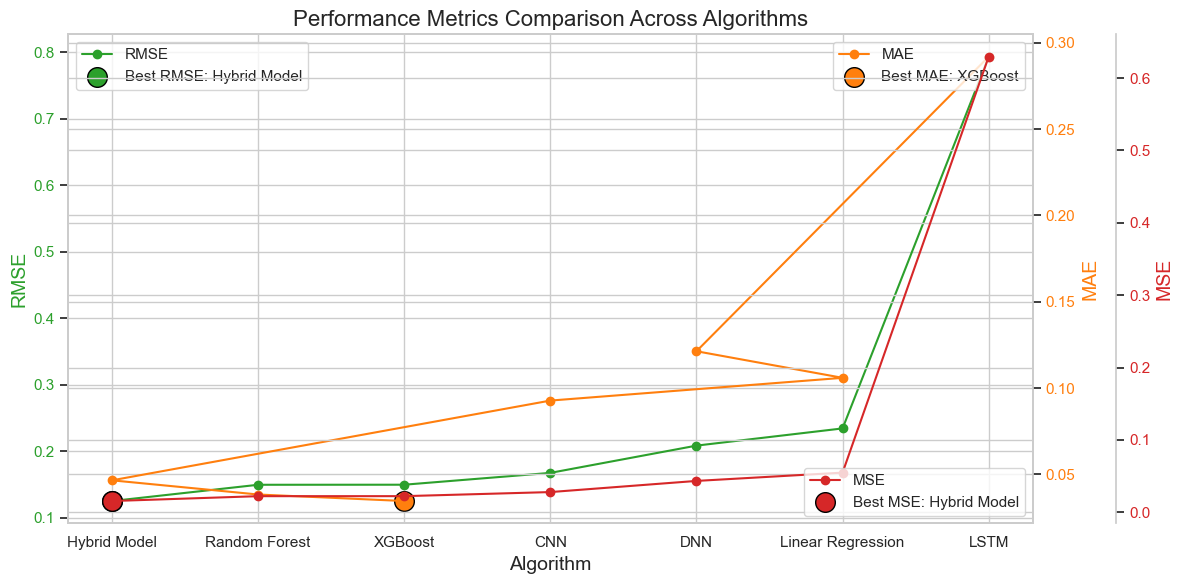

                       RMSE       MAE       MSE       R^2
Model                                                    
Hybrid Model       0.124984  0.046564  0.015621  0.980920
Random Forest      0.149437  0.038352  0.022331  0.972724
XGBoost            0.149529  0.034575  0.022359  0.972691
CNN                0.167325  0.092744  0.027998  0.965804
DNN                0.208338  0.121313  0.043405  0.946985
Linear Regression  0.234220  0.105916  0.054859  0.932995
LSTM               0.793455  0.291904  0.629571  0.231037


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Sort the DataFrame by each metric's least value
df_metrics_sorted_rmse = df_metrics.sort_values(by='RMSE', ascending=True)
df_metrics_sorted_mae = df_metrics.sort_values(by='MAE', ascending=True)
df_metrics_sorted_mse = df_metrics.sort_values(by='MSE', ascending=True)

# Create a single graph with multiple y-axes for RMSE, MAE, and MSE
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot for RMSE
color = 'tab:green'
ax1.set_xlabel('Algorithm', fontsize=14)
ax1.set_ylabel('RMSE', color=color, fontsize=14)
ax1.plot(df_metrics_sorted_rmse.index, df_metrics_sorted_rmse['RMSE'], marker='o', color=color, label='RMSE')
ax1.scatter([df_metrics_sorted_rmse.index[0]], [df_metrics_sorted_rmse['RMSE'].iloc[0]], color=color, marker='o', label=f'Best RMSE: {df_metrics_sorted_rmse.index[0]}', s=200, edgecolor='black')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis for MAE
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('MAE', color=color, fontsize=14)
ax2.plot(df_metrics_sorted_mae.index, df_metrics_sorted_mae['MAE'], marker='o', color=color, label='MAE')
ax2.scatter([df_metrics_sorted_mae.index[0]], [df_metrics_sorted_mae['MAE'].iloc[0]], color=color, marker='o', label=f'Best MAE: {df_metrics_sorted_mae.index[0]}', s=200, edgecolor='black')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Create a third y-axis for MSE
ax3 = ax1.twinx()
color = 'tab:red'
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('MSE', color=color, fontsize=14)
ax3.plot(df_metrics_sorted_mse.index, df_metrics_sorted_mse['MSE'], marker='o', color=color, label='MSE')
ax3.scatter([df_metrics_sorted_mse.index[0]], [df_metrics_sorted_mse['MSE'].iloc[0]], color=color, marker='o', label=f'Best MSE: {df_metrics_sorted_mse.index[0]}', s=200, edgecolor='black')
ax3.tick_params(axis='y', labelcolor=color)
ax3.legend(loc='lower right')

# Customize the plot
plt.title('Performance Metrics Comparison Across Algorithms', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()

print(df_metrics_sorted_rmse)

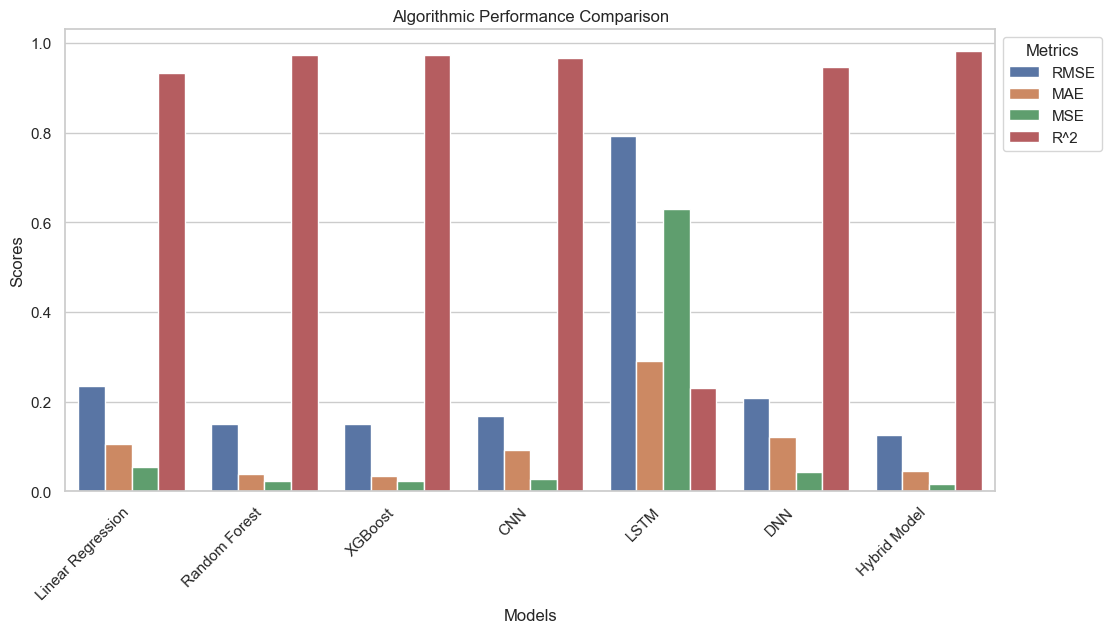

In [38]:
df = df_metrics

# Set the style
sns.set(style="whitegrid")

# Melt the DataFrame for easier plotting
df_melted = pd.melt(df.reset_index(), id_vars='Model', var_name='Metric', value_name='Score')

# Create Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted)
plt.title('Algorithmic Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(title='Metrics', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.show()


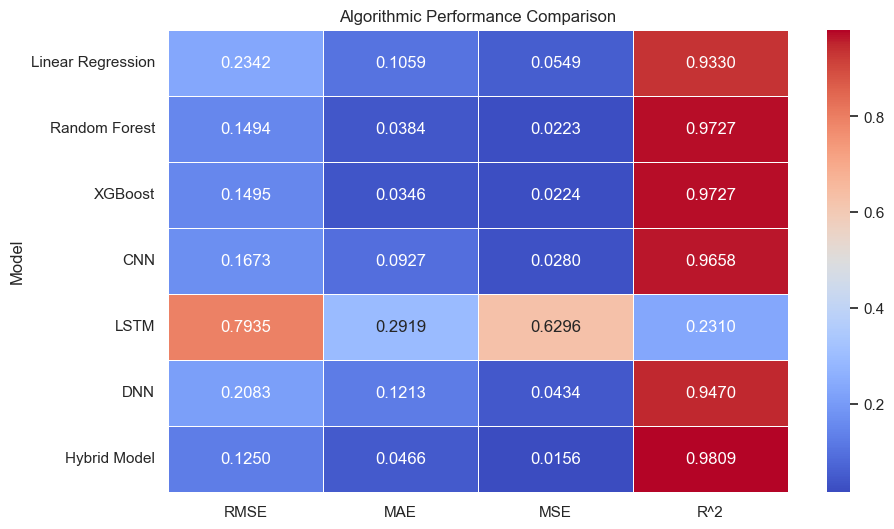

In [39]:
df = df_metrics.reset_index()

# Set the style
sns.set(style="whitegrid")

# Create a heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.set_index('Model'), annot=True, cmap='coolwarm', fmt='.4f', linewidths=.5)
plt.title('Algorithmic Performance Comparison')
plt.show()

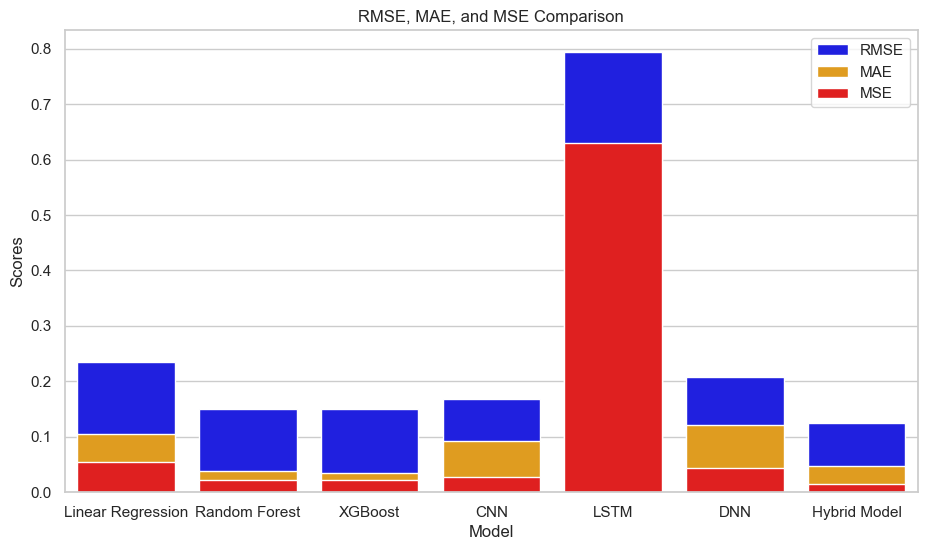

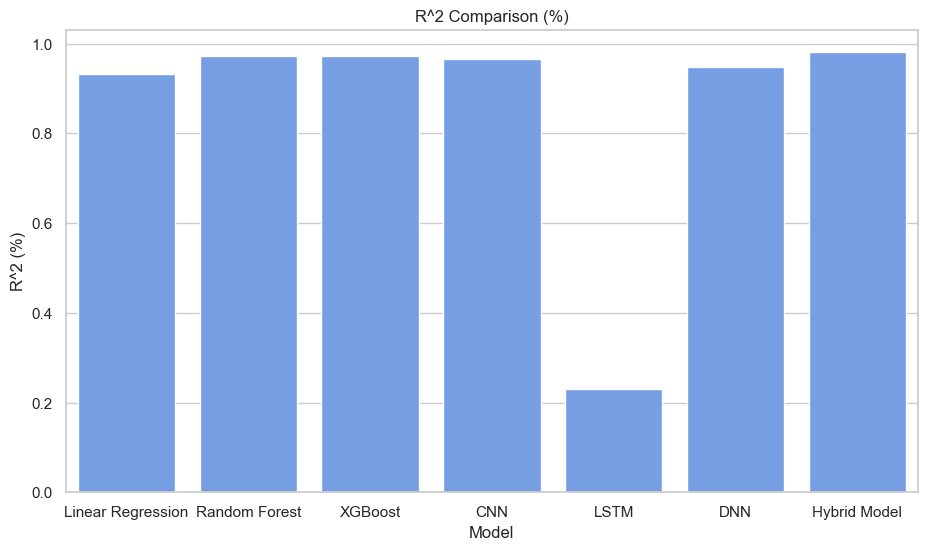

In [40]:
df = df_metrics.reset_index()

# Set the style
sns.set(style="whitegrid")

# Plotting RMSE, MAE, and MSE
plt.figure(figsize=(11, 6))
sns.barplot(x='Model', y='RMSE', data=df, color='blue', label='RMSE')
sns.barplot(x='Model', y='MAE', data=df, color='orange', label='MAE')
sns.barplot(x='Model', y='MSE', data=df, color='red', label='MSE')

plt.title('RMSE, MAE, and MSE Comparison')
plt.ylabel('Scores')
plt.legend()
plt.show()

# Plotting R^2 (%wise)
plt.figure(figsize=(11, 6))
sns.barplot(x='Model', y='R^2', data=df, color='#6399F5')
plt.title('R^2 Comparison (%)')
plt.ylabel('R^2 (%)')
plt.show()